# Document loaders
- Document Loaders are responsible for loading documents from a variety of sources.
- Reference https://python.langchain.com/docs/how_to/#document-loaders

In [1]:
#convert text to vectors
import os
from dotenv import load_dotenv

load_dotenv()

os.environ['OPENAI_API_KEY']=os.getenv('OPENAI_API_KEY')
os.environ['HF_TOKEN']=os.getenv('HF_TOKEN')

## Langsmith Tracking
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"]=os.getenv("LANGCHAIN_PROJECT")



In [2]:
#How to load PDFs

from langchain_community.document_loaders import PyPDFLoader

file_path = "D://GenAI//kalam.pdf"

loader = PyPDFLoader(file_path)
pages = []
for page in loader.load():
    pages.append(page)

print(pages)

[Document(metadata={'source': 'D://GenAI//kalam.pdf', 'page': 0}, page_content="Avul Pakir Jainulabdeen Abdul Kalam BR (/ˈəbdʊl kəˈlɑːm/ ⓘ; 15 October 1931 – 27 July \n2015) was an Indian aerospace scientist and statesman who served as the 11th president of \nIndia from 2002 to 2007. Born and raised in a Muslim family in Rameswaram, Tamil Nadu, \nhe studied physics and aerospace engineering. He spent the next four decades as a \nscientist and science administrator, mainly at the Defence Research and Development \nOrganisation (DRDO) and Indian Space Research Organisation (ISRO) and was intimately \ninvolved in India's civilian space programme and military missile development efforts.[2] He \nthus came to be known as the Missile Man of India for his work on the development \nof ballistic missile and launch vehicle technology.[3][4][5] He also played a pivotal \norganisational, technical, and political role in India's Pokhran-II nuclear tests in 1998, the first \nsince the original nucle

In [3]:
#How to load txt file

from langchain_community.document_loaders import TextLoader

file_path = "D://GenAI//kalam.txt"

loader = TextLoader(file_path)
pages = []

for page in loader.load():
    pages.append(page)

print(pages)


[Document(metadata={'source': 'D://GenAI//kalam.txt'}, page_content='The Defence Research and Development Organisation.\nDefence Research and Development in Ministry of Defence of the Government of India.The Defence Research and Development Organisation.\nDefence Research and Development in Ministry of Defence of the Government of India.The Defence Research and Development Organisation.\nDefence Research and Development in Ministry of Defence of the Government of India.\nThe Defence Research and Development Organisation.\nDefence Research and Development in Ministry of Defence of the Government of India.\nAPJ was born in india')]


In [4]:
#How to load web pages
from langchain_community.document_loaders import WebBaseLoader
import bs4

page_url = "https://python.langchain.com/docs/introduction/"

loader = WebBaseLoader(web_paths=[page_url],
                       bs_kwargs={
        "parse_only": bs4.SoupStrainer(class_="table-of-contents__link toc-highlight"),
    },
    bs_get_text_kwargs={"separator": " | ", "strip": True},)
docs = []
for doc in loader.load():
    docs.append(doc)

assert len(docs) == 1
doc = docs[0]

print(doc)

USER_AGENT environment variable not set, consider setting it to identify your requests.


page_content='Architecture | Guides | Tutorials | How-to guides | Conceptual guide | Integrations | API reference | Ecosystem | 🦜🛠️ LangSmith | 🦜🕸️ LangGraph | Additional resources | Versions | Security | Contributing' metadata={'source': 'https://python.langchain.com/docs/introduction/'}


In [5]:
#https://python.langchain.com/docs/integrations/providers/arxiv/#installation-and-setup
#ArxivLoader is a tool used to fetch and load research papers from the arXiv database, which is a popular repository for academic papers in fields like physics, computer science, and mathematics. It allows users to retrieve papers in a structured format, enabling them to process and analyze the content programmatically.
#for more data source providers go through this link https://python.langchain.com/docs/integrations/providers/all/
from langchain_community.document_loaders import ArxivLoader

loader = ArxivLoader(
    query="reasoning"
)

docs = loader.get_summaries_as_docs()
print(docs[0].page_content[:100])
print(docs[0].metadata)

Large language models (LLMs) have demonstrated impressive reasoning
abilities, but they still strugg
{'Entry ID': 'http://arxiv.org/abs/2410.13080v1', 'Published': datetime.date(2024, 10, 16), 'Title': 'Graph-constrained Reasoning: Faithful Reasoning on Knowledge Graphs with Large Language Models', 'Authors': 'Linhao Luo, Zicheng Zhao, Chen Gong, Gholamreza Haffari, Shirui Pan'}


In [6]:
#load from wikipedia
from langchain_community.retrievers import WikipediaRetriever

retriever = WikipediaRetriever()
docs = retriever.invoke("Elon Musk")
print(docs[0].page_content[:100])



Elon Reeve Musk (; born June 28, 1971) is a businessman known for his key roles in the space company


# Data Transformation
- How to recursively split by characters

In [7]:
#https://python.langchain.com/docs/how_to/recursive_text_splitter/
#Let's go through the parameters set above for RecursiveCharacterTextSplitter:

#chunk_size: The maximum size of a chunk, where size is determined by the length_function.
#chunk_overlap: Target overlap between chunks. Overlapping chunks helps to mitigate loss of information when context is divided between chunks.
#length_function: Function determining the chunk size.
#is_separator_regex: Whether the separator list (defaulting to ["\n\n", "\n", " ", ""]) should be interpreted as regex.


from langchain_text_splitters import RecursiveCharacterTextSplitter

# Load example document
with open("elon.txt", encoding="utf-8") as f:
    state_of_the_union = f.read()


text_splitter = RecursiveCharacterTextSplitter(
    # Set a really small chunk size, just to show.
    chunk_size=100,
    chunk_overlap=20,
    length_function=len,
    is_separator_regex=False,
)
texts = text_splitter.create_documents([state_of_the_union])


In [8]:
#https://python.langchain.com/docs/how_to/character_text_splitter/
from langchain_text_splitters import CharacterTextSplitter

# Load example document
with open("elon.txt", encoding="utf-8") as f:
    state_of_the_union = f.read()

text_splitter = CharacterTextSplitter(
    separator="\t",
    chunk_size=10,
    chunk_overlap=5,
    length_function=len,
    is_separator_regex=False,
)
texts = text_splitter.create_documents([state_of_the_union])


In [9]:
#https://python.langchain.com/docs/how_to/split_html/#overview-of-the-splitters
#How to: split HTML

#Choosing the Right Splitter
    #Use HTMLHeaderTextSplitter when:
        #You need to split an HTML document based on its header hierarchy and maintain metadata about the headers.
    
    #Use HTMLSectionSplitter when:
        #You need to split the document into larger, more general sections, possibly based on custom tags or font sizes.
    
    #Use HTMLSemanticPreservingSplitter when: 
        #You need to split the document into chunks while preserving semantic elements like tables and lists, ensuring that they are not split and that their context is maintained.

html_string = """
<!DOCTYPE html>
  <html lang='en'>
  <head>
    <meta charset='UTF-8'>
    <meta name='viewport' content='width=device-width, initial-scale=1.0'>
    <title>Fancy Example HTML Page</title>
  </head>
  <body>
    <h1>Main Title</h1>
    
    <h2>Section 1: Introduction</h2>
    <p>This section introduces the topic. Below is a list:</p>
    
    <h3>Subsection 1.1: Details</h3>
    <p>This subsection provides additional details. Here's a table:</p>
    
    <h2>Section 2: Media Content</h2>
    

    <h2>Section 3: Code Example</h2>
  
    <h2>Conclusion</h2>
  </body>
  </html>
 """

from langchain_text_splitters import HTMLHeaderTextSplitter

headers_to_split_on = [
    ("h1", "Header-1"),
    ("h2", "Header-2"),
    ("h3", "Header-3"),
]

html_splitter = HTMLHeaderTextSplitter(headers_to_split_on)
html_header_splits = html_splitter.split_text(html_string)


In [10]:
#method 2

from langchain_text_splitters import HTMLHeaderTextSplitter

headers_to_split_on = [
    ("h1", "Header 1"),
    ("h2", "Header 2"),
    ("h3", "Header 3"),
]

url="https://python.langchain.com/docs/how_to/split_html/#choosing-the-right-splitter"


html_splitter = HTMLHeaderTextSplitter(headers_to_split_on)
html_header_splits = html_splitter.split_text_from_url(url)


In [11]:
#https://python.langchain.com/docs/how_to/recursive_json_splitter/
import json
from langchain_text_splitters import RecursiveJsonSplitter
import requests

# This is a large nested json object and will be loaded as a python dict
json_data = requests.get("https://api.smith.langchain.com/openapi.json").json()


splitter = RecursiveJsonSplitter(max_chunk_size=300)

# Recursively split json data - If you need to access/manipulate the smaller json chunks
json_chunks = splitter.split_json(json_data=json_data)

#printing top 3 chunks
for chunk in json_chunks[:3]:
    print(chunk)

# The splitter can also output documents
docs = splitter.create_documents(texts=[json_data])

for doc in docs[:3]:
    print(doc)

#Or use .split_text to obtain string content directly:
texts = splitter.split_text(json_data=json_data)


{'openapi': '3.1.0', 'info': {'title': 'LangSmith', 'version': '0.1.0'}, 'paths': {'/api/v1/sessions/{session_id}': {'get': {'tags': ['tracer-sessions'], 'summary': 'Read Tracer Session', 'description': 'Get a specific session.'}}}}
{'paths': {'/api/v1/sessions/{session_id}': {'get': {'operationId': 'read_tracer_session_api_v1_sessions__session_id__get', 'security': [{'API Key': []}, {'Tenant ID': []}, {'Bearer Auth': []}]}}}}
{'paths': {'/api/v1/sessions/{session_id}': {'get': {'parameters': [{'name': 'session_id', 'in': 'path', 'required': True, 'schema': {'type': 'string', 'format': 'uuid', 'title': 'Session Id'}}, {'name': 'include_stats', 'in': 'query', 'required': False, 'schema': {'type': 'boolean', 'default': False, 'title': 'Include Stats'}}, {'name': 'accept', 'in': 'header', 'required': False, 'schema': {'anyOf': [{'type': 'string'}, {'type': 'null'}], 'title': 'Accept'}}]}}}}
page_content='{"openapi": "3.1.0", "info": {"title": "LangSmith", "version": "0.1.0"}, "paths": {"/

# OpenAIEmbeddings

In [12]:
from langchain_openai import OpenAIEmbeddings

#https://platform.openai.com/docs/guides/embeddings

embeddings = OpenAIEmbeddings(model="text-embedding-3-small")

text = "Hi this is shanmukh"
result = embeddings.embed_query(text)
print(result[0])

-0.001864203019067645


In [13]:
from langchain_openai import OpenAIEmbeddings
#https://platform.openai.com/docs/guides/embeddings

embeddings = OpenAIEmbeddings(model="text-embedding-3-small",dimensions=199)
print(embeddings)


text = "Hi this is shanmukh"
result = embeddings.embed_query(text)
print(result)
print(len(result))


client=<openai.resources.embeddings.Embeddings object at 0x000002D45CB00040> async_client=<openai.resources.embeddings.AsyncEmbeddings object at 0x000002D45DFC58E0> model='text-embedding-3-small' dimensions=199 deployment='text-embedding-ada-002' openai_api_version=None openai_api_base=None openai_api_type=None openai_proxy=None embedding_ctx_length=8191 openai_api_key=SecretStr('**********') openai_organization=None allowed_special=None disallowed_special=None chunk_size=1000 max_retries=2 request_timeout=None headers=None tiktoken_enabled=True tiktoken_model_name=None show_progress_bar=False model_kwargs={} skip_empty=False default_headers=None default_query=None retry_min_seconds=4 retry_max_seconds=20 http_client=None http_async_client=None check_embedding_ctx_length=True
[-0.00402143644168973, -0.11767087131738663, 0.051633257418870926, -0.00761921564117074, -0.03791734576225281, -0.1177767887711525, 0.08880920708179474, 0.11724721640348434, -0.08690274506807327, -0.05719376355409

In [14]:
from langchain_openai import OpenAIEmbeddings
from uuid import uuid4
from langchain_core.documents import Document
from langchain_chroma import Chroma



embeddings = OpenAIEmbeddings(model="text-embedding-3-large")

vector_store = Chroma(
    collection_name="example_collection",
    embedding_function=embeddings,
    persist_directory="./chroma_langchain_db",  # Where to save data locally, remove if not necessary
)

document_1 = Document(
    page_content="I had chocolate chip pancakes and scrambled eggs for breakfast this morning.",
    metadata={"source": "tweet"},
    id=1,
)

document_2 = Document(
    page_content="The weather forecast for tomorrow is cloudy and overcast, with a high of 62 degrees.",
    metadata={"source": "news"},
    id=2,
)

document_3 = Document(
    page_content="Building an exciting new project with LangChain - come check it out!",
    metadata={"source": "tweet"},
    id=3,
)

document_4 = Document(
    page_content="Robbers broke into the city bank and stole $1 million in cash.",
    metadata={"source": "news"},
    id=4,
)

document_5 = Document(
    page_content="Wow! That was an amazing movie. I can't wait to see it again.",
    metadata={"source": "tweet"},
    id=5,
)

document_6 = Document(
    page_content="Is the new iPhone worth the price? Read this review to find out.",
    metadata={"source": "website"},
    id=6,
)

document_7 = Document(
    page_content="The top 10 soccer players in the world right now.",
    metadata={"source": "website"},
    id=7,
)

document_8 = Document(
    page_content="LangGraph is the best framework for building stateful, agentic applications!",
    metadata={"source": "tweet"},
    id=8,
)

document_9 = Document(
    page_content="The stock market is down 500 points today due to fears of a recession.",
    metadata={"source": "news"},
    id=9,
)

document_10 = Document(
    page_content="I have a bad feeling I am going to get deleted :(",
    metadata={"source": "tweet"},
    id=10,
)

documents = [
    document_1,
    document_2,
    document_3,
    document_4,
    document_5,
    document_6,
    document_7,
    document_8,
    document_9,
    document_10,
]
uuids = [str(uuid4()) for _ in range(len(documents))]

vector_store.add_documents(documents=documents, ids=uuids)


results = vector_store.similarity_search(
    "LangChain provides abstractions to make working with LLMs easy",
    k=2,
    filter={"source": "tweet"},
)
for res in results:
    print(f"* {res.page_content} [{res.metadata}]")



#k=1 specifies the number of results that the similarity search should return.
results = vector_store.similarity_search_with_score(
    "Will it be hot tomorrow?", k=1, filter={"source": "news"}
)
for res, score in results:
    print(f"* [SIM={score:3f}] {res.page_content} [{res.metadata}]")

#Search by vector
results = vector_store.similarity_search_by_vector(
    embedding=embeddings.embed_query("I love green eggs and ham!"), k=1
)
for doc in results:
    print(f"* {doc.page_content} [{doc.metadata}]")

* Building an exciting new project with LangChain - come check it out! [{'source': 'tweet'}]
* Building an exciting new project with LangChain - come check it out! [{'source': 'tweet'}]
* [SIM=0.893574] The weather forecast for tomorrow is cloudy and overcast, with a high of 62 degrees. [{'source': 'news'}]
* I had chocolate chip pancakes and scrambled eggs for breakfast this morning. [{'source': 'tweet'}]


In [15]:
from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter


file_path = "D://GenAI//kalam.txt"

loader = TextLoader(file_path)

docs = loader.load()

text_splitter = RecursiveCharacterTextSplitter(
    # Set a really small chunk size, just to show.
    chunk_size=100,
    chunk_overlap=20,
    length_function=len,
    is_separator_regex=False,
)

final_docs = text_splitter.split_documents(docs)



embeddings = OpenAIEmbeddings(model="text-embedding-3-large")

vector_store = Chroma(
    collection_name="example_collection1",
    embedding_function=embeddings,
    persist_directory="./chroma_langchain_db1",  # Where to save data locally, remove if not necessary
)

vector_store.add_documents(final_docs)

results = vector_store.similarity_search(
    "Where is APJ Born",
    k=1,
)
for res in results:
    print(f"* {res.page_content} [{res.metadata}]")






* APJ was born in india [{'source': 'D://GenAI//kalam.txt'}]


# 2.Ollama 

# 2.1 Understanding Ollama
- Ollama is a platform for running large language models locally. It allows you to download different models to your local   machine and use them for tasks like natural language processing (NLP), text generation, and more.

# Key Features:
- Download and run models locally.
- Supports multiple pre-trained models.
- Can be integrated with other applications.
- Ensures data privacy as everything runs on your local machine.
- Offline Capability
  Once the models are downloaded and set up, you can use them even without an internet connection, which is especially helpful in areas with limited or no internet access.
- If you frequently use language models, running them locally could save on cloud computing costs, especially when using large    models that might require expensive cloud infrastructure to run.

# 2.2 How to Use Ollama
- Step 1: Install Ollama
  To get started with Ollama, you need to first download and install the Ollama CLI tool. You can do this by following the instructions provided on the official website:

# Visit Ollama's website.
- Download the installer for your operating system (Windows, Mac, Linux).
- Run the installer to set up the Ollama CLI on your machine.

# 2.3 Advantages of Running Models Locally
- Privacy: Your data stays on your local machine, offering more privacy than cloud-based solutions.
- Customization: You can fine-tune models for your specific use case if needed.
- Faster Responses: Running models locally can provide faster inference times as compared to cloud-based solutions, 
  especially if  you have powerful hardware.

# sample output generated in CMD

- C:\Users\Adari Shanmukh>ollama run gemma2:2b
pulling manifest
pulling 7462734796d6... 100% ▕████████████████████████████████████████████████████████▏ 1.6 GB
pulling e0a42594d802... 100% ▕████████████████████████████████████████████████████████▏  358 B
pulling 097a36493f71... 100% ▕████████████████████████████████████████████████████████▏ 8.4 KB
pulling 2490e7468436... 100% ▕████████████████████████████████████████████████████████▏   65 B
pulling e18ad7af7efb... 100% ▕████████████████████████████████████████████████████████▏  487 B
verifying sha256 digest
writing manifest
success
>>> hi
Hi there! 👋 How can I help you today? 😊


>>> who are you
I'm Gemma, an AI assistant developed by the Google DeepMind team.  I'm here to help you with any questions or
tasks you might have!

What can I do for you today? 😄


>>> Send a message (/? for help)

In [16]:
#olama embedding
#https://ollama.com/blog/embedding-models


from langchain_community.embeddings import OllamaEmbeddings


embeddings = OllamaEmbeddings(model="gemma2:2b")

embeddings

C:\Users\Adari Shanmukh\AppData\Local\Temp\ipykernel_6420\3053467427.py:8: LangChainDeprecationWarning: The class `OllamaEmbeddings` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaEmbeddings``.
  embeddings = OllamaEmbeddings(model="gemma2:2b")


OllamaEmbeddings(base_url='http://localhost:11434', model='gemma2:2b', embed_instruction='passage: ', query_instruction='query: ', mirostat=None, mirostat_eta=None, mirostat_tau=None, num_ctx=None, num_gpu=None, num_thread=None, repeat_last_n=None, repeat_penalty=None, temperature=None, stop=None, tfs_z=None, top_k=None, top_p=None, show_progress=False, headers=None, model_kwargs=None)

In [17]:
r1 = embeddings.embed_documents(
    [
        "Hi this is shanmukh",
        "Welcome to INDIA"
    ]
)

print(len(r1[0]))

2304


In [18]:
r2 = embeddings.embed_query("Who is shanmukh Adari")
print(len(r2))

2304


In [19]:
from langchain_community.embeddings import OllamaEmbeddings


embeddings = OllamaEmbeddings(model="mxbai-embed-large")

r3 = embeddings.embed_query("Who is shanmukh Adari")
print(len(r3))

1024


# Hugging Face Embedding Technique

In [20]:
#https://huggingface.co/models

from langchain_huggingface import HuggingFaceEmbeddings

embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

r3 = embeddings.embed_documents(
    [
        "Hi this is shanmukh",
        "Welcome to INDIA"
    ]
)

print(len(r3[0]))

d:\GenAI\virtualenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


384


# Vector Stores Embeddings

- FAISS (Facebook AI Similarity Search) is a library for efficient similarity search and clustering of high-dimensional vectors (embeddings). It's commonly used for tasks like:

- Search: Finding similar items (e.g., documents, images) based on their vector embeddings.
- Clustering: Grouping vectors into clusters for tasks like document categorization.
Key Features:
- Fast Search: Optimized for high-speed nearest neighbor search in large datasets.
- Efficient Indexing: Supports different indexing methods to balance speed and memory usage.
- Scalability: Works well with large datasets, even in millions or billions of vectors.

In [21]:
#How to load txt file
from langchain_community.document_loaders import TextLoader
from langchain_community.embeddings import OllamaEmbeddings
from langchain_community.vectorstores import FAISS
from langchain_text_splitters import RecursiveCharacterTextSplitter

file_path = "D://GenAI//elon.txt"

loader = TextLoader(file_path)

docs = loader.load()

text_splitter = RecursiveCharacterTextSplitter(
    # Set a really small chunk size, just to show.
    chunk_size=100,
    chunk_overlap=20,
    length_function=len,
    is_separator_regex=False,
)

final_docs = text_splitter.split_documents(docs)

embeddings = OllamaEmbeddings(model="gemma2:2b")

vector_store = FAISS.from_documents(final_docs,embeddings)

print(vector_store)


results = vector_store.similarity_search(
    "is the CEO of Tesla",
    k=1,
)

for res in results:
    print(f"* {res.page_content} [{res.metadata}]")





* - Musk is the CEO of **Tesla**, an electric vehicle (EV) company focused on sustainable energy. [{'source': 'D://GenAI//elon.txt'}]


In [22]:
#convert vector store db into retriver and start querying
retriver = vector_store.as_retriever()
query="CEO of Telsa"
retriver.invoke(query)


[Document(id='9f3ba674-d4df-4ec6-b9d4-b0ca2e4a73fe', metadata={'source': 'D://GenAI//elon.txt'}, page_content='- Musk is the CEO of **Tesla**, an electric vehicle (EV) company focused on sustainable energy.'),
 Document(id='7eea00e2-9881-47c6-900c-022faec588ca', metadata={'source': 'D://GenAI//elon.txt'}, page_content='**Mars colonization plan**.'),
 Document(id='5a9c5488-05f9-4363-a2b6-05b40da6fc59', metadata={'source': 'D://GenAI//elon.txt'}, page_content='### 1. **Tesla**:'),
 Document(id='e276e930-cb30-42e4-b2b2-0ff808919714', metadata={'source': 'D://GenAI//elon.txt'}, page_content='merge humans with artificial intelligence.')]

In [23]:
#Similarity Search With Score
#Lower the score higher the chances of result

docs_and_similarity_search_score = vector_store.similarity_search_with_score(query)
docs_and_similarity_search_score

[(Document(id='9f3ba674-d4df-4ec6-b9d4-b0ca2e4a73fe', metadata={'source': 'D://GenAI//elon.txt'}, page_content='- Musk is the CEO of **Tesla**, an electric vehicle (EV) company focused on sustainable energy.'),
  6368.032),
 (Document(id='7eea00e2-9881-47c6-900c-022faec588ca', metadata={'source': 'D://GenAI//elon.txt'}, page_content='**Mars colonization plan**.'),
  7681.753),
 (Document(id='5a9c5488-05f9-4363-a2b6-05b40da6fc59', metadata={'source': 'D://GenAI//elon.txt'}, page_content='### 1. **Tesla**:'),
  7851.2397),
 (Document(id='e276e930-cb30-42e4-b2b2-0ff808919714', metadata={'source': 'D://GenAI//elon.txt'}, page_content='merge humans with artificial intelligence.'),
  8894.1)]

In [24]:
#instead of passing sentences we can also pass vectos

embeddings = OllamaEmbeddings(model="gemma2:2b")

embedding_query =  embeddings.embed_query(query)


docs_and_similarity_search_score = vector_store.similarity_search_with_score(embedding_query)

docs_and_similarity_search_score

#Save vector store in db
vector_store.save_local("elon_local_fssai")

In [25]:
new_db = FAISS.load_local('elon_local_fssai',embeddings,allow_dangerous_deserialization=True)
print(new_db)

embedding_query =  embeddings.embed_query(query)
docs_and_similarity_search_score = vector_store.similarity_search_with_score(embedding_query)

print(docs_and_similarity_search_score)

[(Document(id='f99eed4a-39f7-4207-8296-127a6f56cff6', metadata={'source': 'D://GenAI//elon.txt'}, page_content='and leading multiple high-profile technology companies. Here are some key highlights:'), 12123.922), (Document(id='7eea00e2-9881-47c6-900c-022faec588ca', metadata={'source': 'D://GenAI//elon.txt'}, page_content='**Mars colonization plan**.'), 13420.537), (Document(id='f324fa91-a0f2-49c9-b92c-97c8a9a2dd78', metadata={'source': 'D://GenAI//elon.txt'}, page_content='including automotive, aerospace, and energy.'), 13474.359), (Document(id='e276e930-cb30-42e4-b2b2-0ff808919714', metadata={'source': 'D://GenAI//elon.txt'}, page_content='merge humans with artificial intelligence.'), 14485.816)]


# Chroma

In [26]:
from langchain_chroma import Chroma
from langchain_community.document_loaders import TextLoader
from langchain_community.embeddings import OllamaEmbeddings
from langchain_community.vectorstores import FAISS
from langchain_text_splitters import RecursiveCharacterTextSplitter



file_path = "D://GenAI//elon.txt"

loader = TextLoader(file_path)

docs = loader.load()

text_splitter = RecursiveCharacterTextSplitter(
    # Set a really small chunk size, just to show.
    chunk_size=100,
    chunk_overlap=20,
    length_function=len,
    is_separator_regex=False,
)

final_docs = text_splitter.split_documents(docs)

embeddings = OllamaEmbeddings(model="gemma2:2b")

vector_store = Chroma.from_documents(final_docs,embeddings,persist_directory="./chroma_langchain_db1") # Where to save data locally, remove if not necessary)

print(vector_store)


results = vector_store.similarity_search(
    "is the CEO of Tesla",
    k=1,
)

for res in results:
    print(f"* {res.page_content} [{res.metadata}]")





* - Musk is the CEO of **Tesla**, an electric vehicle (EV) company focused on sustainable energy. [{'source': 'D://GenAI//elon.txt'}]


- The main difference between using `vector_store.similarity_search()` and `vector_store.as_retriever()` lies in how they are designed to be used and their flexibility within Langchain workflows.

### 1. `vector_store.similarity_search()`:
   - **Direct Query**: This is a direct method to perform a semantic search. You provide a query, and it directly returns the most relevant documents from the vector store.
   - **Use Case**: It's ideal when you just need to quickly retrieve documents for a single query.
   - **Output**: It returns the matching documents immediately without additional configuration.
   - **Example**:
     ```python
     results = vector_store.similarity_search("Where is APJ Born?")
     ```

### 2. `vector_store.as_retriever()`:
   - **Retriever Object**: This converts the vector store into a retriever object that can be used multiple times for different queries. The retriever can also be integrated into more complex Langchain workflows (e.g., chains, agents).
   
   - **Use Case**: It’s useful when you want to repeatedly search the vector store or integrate it into Langchain's advanced workflows (e.g., chaining multiple tasks or using an agent).
   - **Output**: It returns a retriever object that you can use for multiple queries.
   - **Example**:
     ```python
     retriever = vector_store.as_retriever()
     results = retriever.retrieve("Where is APJ Born?")
     ```

### Why Use `as_retriever()`:
- **Flexibility**: If you're building a more complex system where you want to do repeated searches, manage retrieval logic, or integrate it with Langchain's chain/agent system, the retriever is a more scalable option.
- **Reusable**: You can reuse the retriever across multiple queries, which makes it better for continuous or multi-step workflows.

### Summary:
- `similarity_search()` is for **quick, one-time searches**.
- `as_retriever()` gives you a **retriever object** for **repeated queries** and integration into larger Langchain workflows (like chains or agents).


In [27]:
#load the disk
load_vector_db = Chroma(persist_directory="./chroma_langchain_db1",embedding_function=embeddings)

results = load_vector_db.similarity_search(
    "is the CEO of Tesla",
)
print(results)

#get result by score

embedding_query =  embeddings.embed_query(query)

docs_and_similarity_search_score = load_vector_db.similarity_search_with_score(embedding_query)

print(docs_and_similarity_search_score)


#convert vector store db into retriver and start querying
retriver = load_vector_db.as_retriever()
query="CEO of Telsa"
print(retriver.invoke(query))



#Lots of research needs to be done on this 
#https://python.langchain.com/docs/how_to/#vector-stores



[Document(id='d667071a-1bf9-4240-b8e6-6fc3f24e9a73', metadata={'source': 'D://GenAI//elon.txt'}, page_content='- Musk is the CEO of **Tesla**, an electric vehicle (EV) company focused on sustainable energy.'), Document(id='32aa712d-175d-45e9-aeeb-98173552e696', metadata={'source': 'D://GenAI//elon.txt'}, page_content='- Musk is the CEO of **Tesla**, an electric vehicle (EV) company focused on sustainable energy.'), Document(id='50584165-573e-4d73-8b56-334a29d0ddbb', metadata={'source': 'D://GenAI//elon.txt'}, page_content='### 1. **Tesla**:'), Document(id='de656fcf-84ea-46fa-986c-b091af4ecb41', metadata={'source': 'D://GenAI//elon.txt'}, page_content='### 1. **Tesla**:')]
[(Document(id='e03a0790-2aad-4ea3-a553-1b58ead52a1f', metadata={'source': 'D://GenAI//elon.txt'}, page_content='and leading multiple high-profile technology companies. Here are some key highlights:'), 12123.922911225569), (Document(id='3c55c439-7a6d-4937-ad60-a4289b9a175f', metadata={'source': 'D://GenAI//elon.txt'}, 

#LangSmith


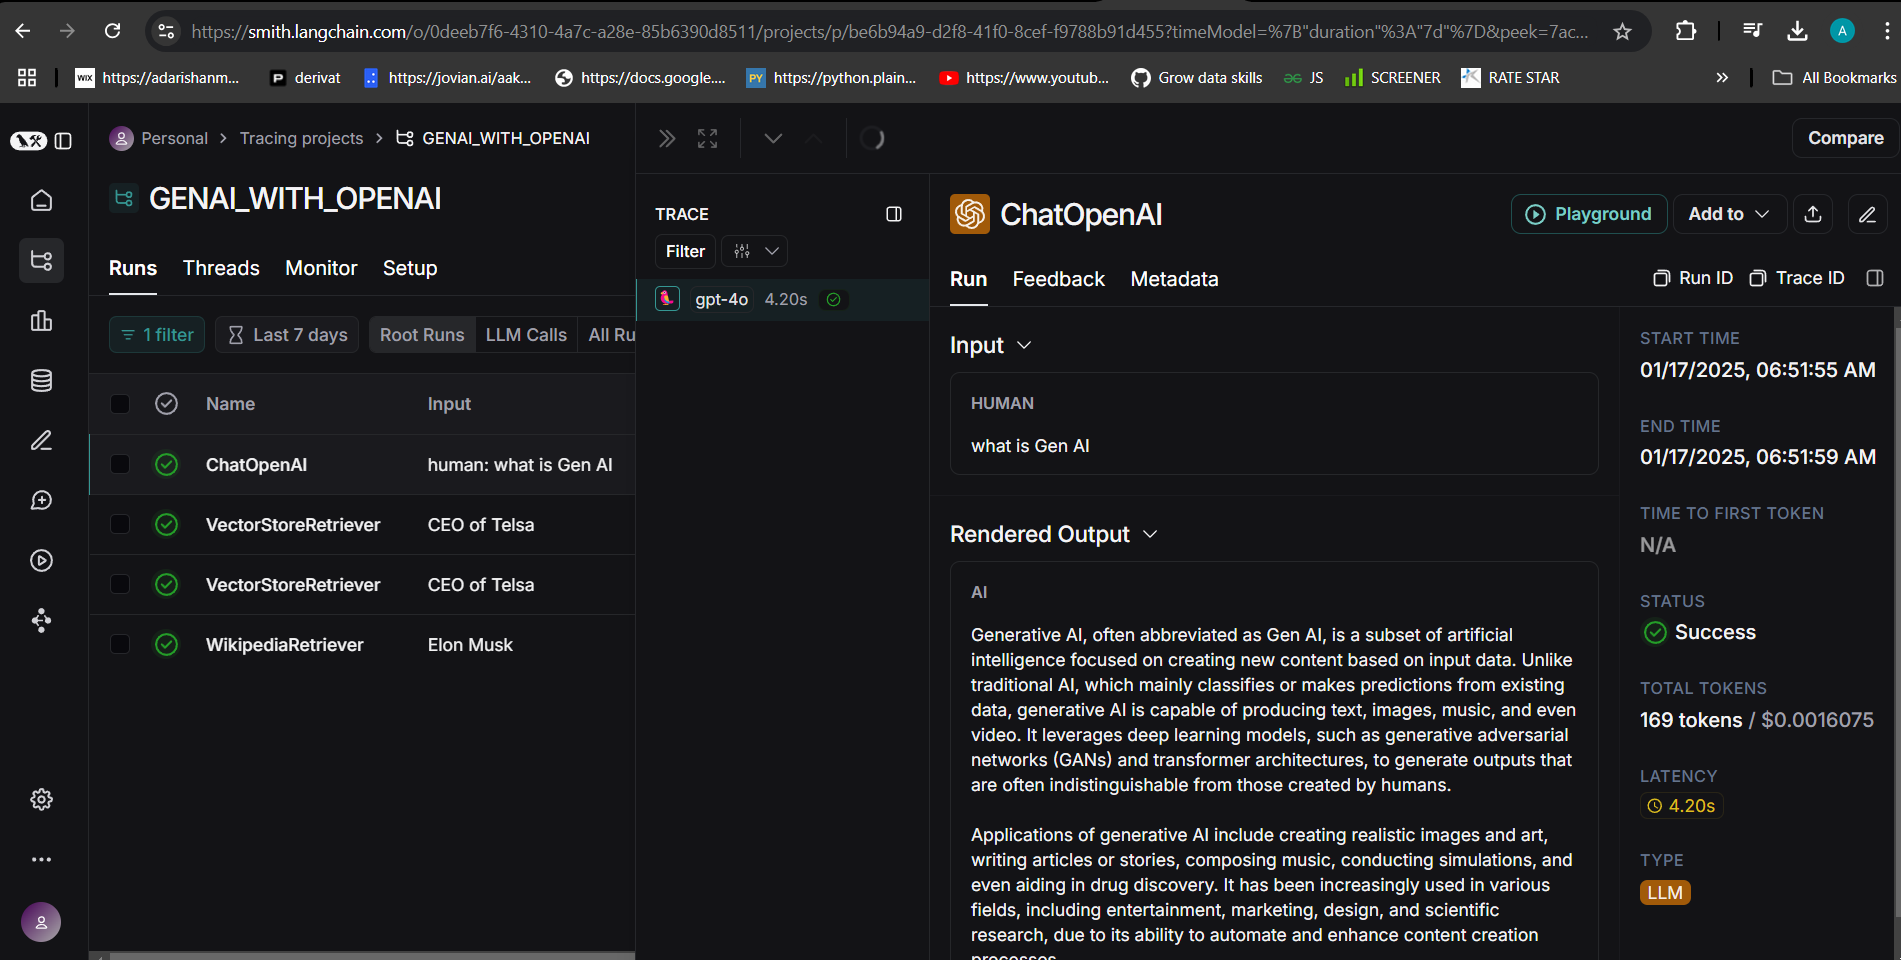

In [29]:
from IPython.display import display, Image

# Display an image with more control
display(Image(filename='langsmith.png'))


In [28]:
#
from langchain_openai import ChatOpenAI
llm=ChatOpenAI(model="gpt-4o")
print(llm)
llm.invoke("what is Gen AI")

client=<openai.resources.chat.completions.Completions object at 0x000002D406C5FEE0> async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x000002D407180A60> root_client=<openai.OpenAI object at 0x000002D406E62460> root_async_client=<openai.AsyncOpenAI object at 0x000002D406C5F850> model_name='gpt-4o' model_kwargs={} openai_api_key=SecretStr('**********')


AIMessage(content='Generative AI, often abbreviated as Gen AI, is a subset of artificial intelligence focused on creating new content based on input data. Unlike traditional AI, which mainly classifies or makes predictions from existing data, generative AI is capable of producing text, images, music, and even video. It leverages deep learning models, such as generative adversarial networks (GANs) and transformer architectures, to generate outputs that are often indistinguishable from those created by humans.\n\nApplications of generative AI include creating realistic images and art, writing articles or stories, composing music, conducting simulations, and even aiding in drug discovery. It has been increasingly used in various fields, including entertainment, marketing, design, and scientific research, due to its ability to automate and enhance content creation processes.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 158, 'prompt_tokens':

In [30]:
### Chatprompt Template
from langchain_core.prompts import ChatPromptTemplate

prompt=ChatPromptTemplate.from_messages(
    [
        ("system","You are an expert AI Engineer. Provide me answers based on the questions"),
        ("user","{input}")
    ]

)
prompt

ChatPromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are an expert AI Engineer. Provide me answers based on the questions'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, template='{input}'), additional_kwargs={})])

In [31]:
## chain 
chain=prompt|llm

response=chain.invoke({"input":"Can you tell me about Langsmith?"})
print(response)

content='Langsmith is a platform developed by the team behind Langchain, designed to enhance the development and deployment of applications using language models. It focuses on providing developers with tools and features to improve the testing, evaluation, and monitoring of language model applications. Langsmith integrates with the Langchain framework, offering capabilities such as evaluating model outputs, tracking application usage, and debugging complex workflows, thereby helping developers manage and optimize their language model applications more effectively.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 89, 'prompt_tokens': 33, 'total_tokens': 122, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_50cad350e4', 'finish_r

In [32]:
type(response)

langchain_core.messages.ai.AIMessage

In [33]:
## stroutput Parser

from langchain_core.output_parsers import StrOutputParser
output_parser=StrOutputParser()
chain=prompt|llm|output_parser

response=chain.invoke({"input":"Can you tell me about Langsmith?"})
print(response)

Langsmith is a suite of developer tools created by LangChain designed to facilitate the development, testing, debugging, and deployment of applications that utilize language models. It enhances the traditional LangChain framework by providing capabilities for evaluation, monitoring, and tracing to improve the performance and reliability of applications. Langsmith offers both client and server-side functionalities, allowing developers to track the behavior of their applications, debug them effectively, and ensure they meet performance expectations. Additionally, it integrates seamlessly with the LangChain framework, providing users with a comprehensive environment for building sophisticated language model-powered applications.
